In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import seaborn as sns

plt.style.use("seaborn-v0_8-paper")

#colors =["#7c1d6f","#045275"]
colors =["#ED4638","#0A2C52"]

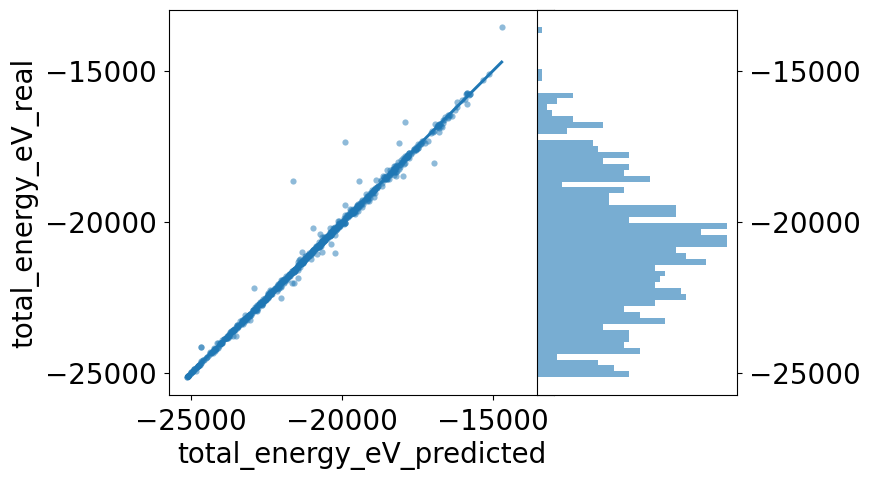

R2 fit 0.9936493312160682


In [2]:

target = "total_energy_eV"

df = pd.read_csv(f"/home/tom/git_workspace/GrapheNetDefectDetector/data/{target}_predictions.csv", header=0)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5), gridspec_kw={'width_ratios': [4, 1]})

# Plot the scatter plot on the left subplot
ax1.set_xlabel('EA (eV) - predicted',size=20)
ax1.set_ylabel('EA (eV) - true',size=20)

ax1.tick_params(axis='both', which='major', labelsize=20)

MAX=np.max([df[f'{target}_predicted'].to_numpy(), df[f'{target}_real'].to_numpy()])
MIN=np.min([df[f'{target}_predicted'].to_numpy(), df[f'{target}_real'].to_numpy()])

offset = 0.05 * np.abs(MAX-MIN)

bound = [MIN-offset, MAX+offset]
#ax1.axis('equal')
ax1.set_xlim(bound)
ax1.set_ylim(bound)
ax1.set_yticks([-15000,-20000,-25000])
ax1.set_box_aspect(1)

# Add y=x reference axis
sns.regplot(x=f'{target}_predicted', y=f'{target}_real', data=df, ax=ax1, scatter_kws={'s': 20, 'alpha': 0.5})

# Plot the histogram on the right subplot
ax2.set_ylim(bound)
hist_data=df[f'{target}_real']
ax2.hist(hist_data, orientation='horizontal',bins=round(2*np.sqrt(len(hist_data))),linewidth=0,alpha=0.6)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax2.set_xticks([])
ax2.set_yticks([-15000,-20000,-25000])
ax2.yaxis.tick_right()
# Adjust the position of the subplots
fig.subplots_adjust(wspace=-0.45)

# Show the plot
plt.show()

print(f"R2 fit {r2_score(df[f'{target}_predicted'], df[f'{target}_real'])}")

<Figure size 1000x500 with 0 Axes>

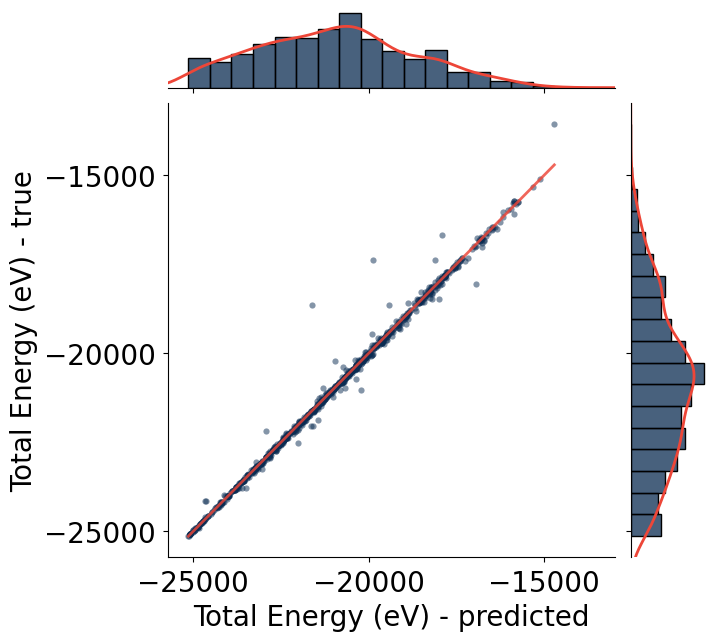

In [4]:
# colors =["#ED4638","#0A2C52"]
#colors = ["#CE4F38", "#1D5CAF"]
colors=["#F0741E","#276CB3"]
target_ticks = {
    "fermi_level_ev": [-5.55, -5.10, -4.66],
    "EA_ev": [-5.65, -5.25, -4.85],
    "IP_ev": [4.4, 4.9, 5.4],
    "band_gap_ev": [-11.2, -10.3, -9.4],
    "total_energy_eV": [-15000, -20000, -25000],
    "energy_per_atom": [-49.2, -48.8, -48.4],
}
target_labels = {
    "fermi_level_ev": ("Fermi Level [eV] - predicted", "Fermi Level[eV] - true"),
    "EA_ev":  ("Electron Affinity [eV] - predicted" ,"Electron Affinity [eV] - true"),
    "IP_ev":  ("Ionization Potential [eV] - predicted" ,"Ionization Potential [eV] - true"),
    "band_gap_ev":  ("Band Gap [eV] - predicted", "Band Gap [eV] - true"),
    "total_energy_eV": ("Total Energy (eV) - predicted" ,"Total Energy (eV) - true"),
    "energy_per_atom":("Energy Per Atom (eV) - predicted" ,"Energy Per Atom (eV) - true"),
}

for target in target_list:
    ticks = target_ticks[f"{target}"]
    df = pd.read_csv(
        f"/home/mario/Mario/Phd_code/GDD/GrapheNetDefectDetector/{target}_predictions.csv",
        header=0,
    )

    MAX = np.max([df[f"{target}_predicted"].to_numpy(), df[f"{target}_real"].to_numpy()])
    MIN = np.min([df[f"{target}_predicted"].to_numpy(), df[f"{target}_real"].to_numpy()])

    offset = 0.05 * np.abs(MAX - MIN)
    bound = [MIN - offset, MAX + offset]

    fig = plt.figure(figsize=(8, 8))

    g = sns.JointGrid()
    x, y = df[f"{target}_predicted"], df[f"{target}_real"]
    sns.regplot(
        x=f"{target}_predicted",
        y=f"{target}_real",
        data=df,
        ax=g.ax_joint,
        scatter_kws={"s": 40, "alpha": 0.5, "color": colors[1]},
        line_kws={"linewidth": 3, "alpha": 1, "color": colors[0]},
    )
    sns.histplot(
        x=x,
        fill=True,
        linewidth=1,
        kde=False,
        ax=g.ax_marg_x,
        stat="density",
        color=colors[1],
    )
    sns.kdeplot(x=x, linewidth=2, ax=g.ax_marg_x, color=colors[0])
    sns.histplot(
        y=y,
        fill=True,
        linewidth=1,
        kde=False,
        ax=g.ax_marg_y,
        stat="density",
        color=colors[1],
    )
    sns.kdeplot(y=y, linewidth=2, ax=g.ax_marg_y, color=colors[0])
    g.ax_joint.set_xticks(ticks)
    g.ax_joint.set_yticks(ticks)
    g.ax_joint.set_xlim(bound)
    g.ax_joint.set_ylim(bound)
    g.ax_joint.tick_params(axis="both", which="major", labelsize=20)

    g.set_axis_labels(
        target_labels[f'{target}'][0],target_labels[f'{target}'][1], fontsize=20
    )

    plt.savefig(f'{target}.png', dpi=300, bbox_inches='tight')
